## **🩺 Heart Disease Prediction using XGBoost**

 **Goal:** Train an XGBoost classifier to predict heart disease using patient health metrics from
 the UCI Heart Disease dataset.

### **Install the dataset**

In [65]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
redwankarimsony_heart_disease_data_path = kagglehub.dataset_download('redwankarimsony/heart-disease-data')

print('Data source import complete.')

Data source import complete.


In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv


**Load the Heart Disease Dataset**

In [68]:
# Load the dataset
df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

# Rename 'num' column to 'target' for clarity
df.rename(columns={'num': 'target'}, inplace=True)

# Display the first few rows
print(df.head())
# Target: 1 = disease present, 0 = no disease

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  target  
0       fixed defect       0  
1             normal       2  
2  reversable defect       1  
3             normal       0  
4             normal 

**Explore and Preprocess the Data**

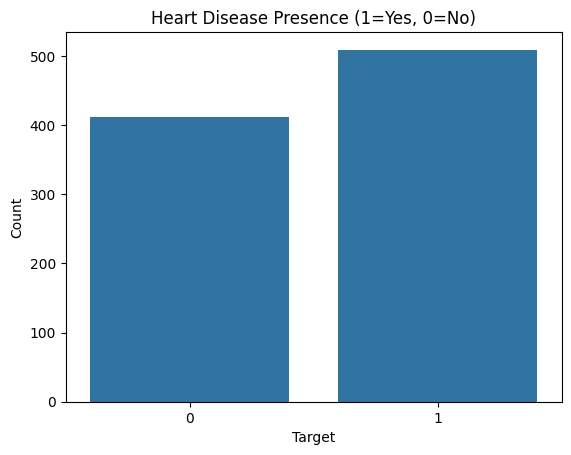

In [69]:
# Rename 'num' to 'target'
df.rename(columns={'num': 'target'}, inplace=True)

# Convert target to binary: 0 = no disease, 1 = disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Handle missing numeric values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Plot the class distribution
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence (1=Yes, 0=No)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

**Split into Train and Test Sets**

In [70]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train XGBoost Model**

In [71]:
# Train XGBoost classifier (binary)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**Make Predictions and Evaluate**

Accuracy: 0.8532608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



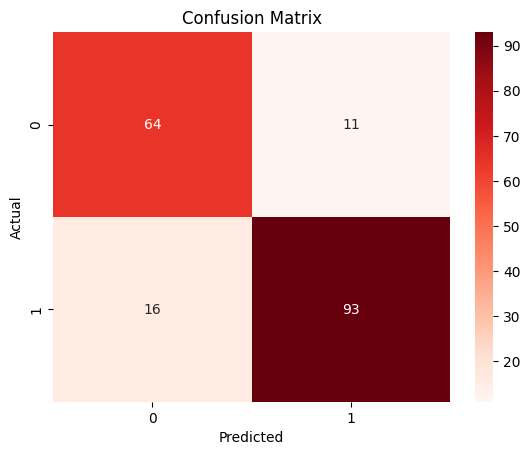

In [72]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature Importance Plot**

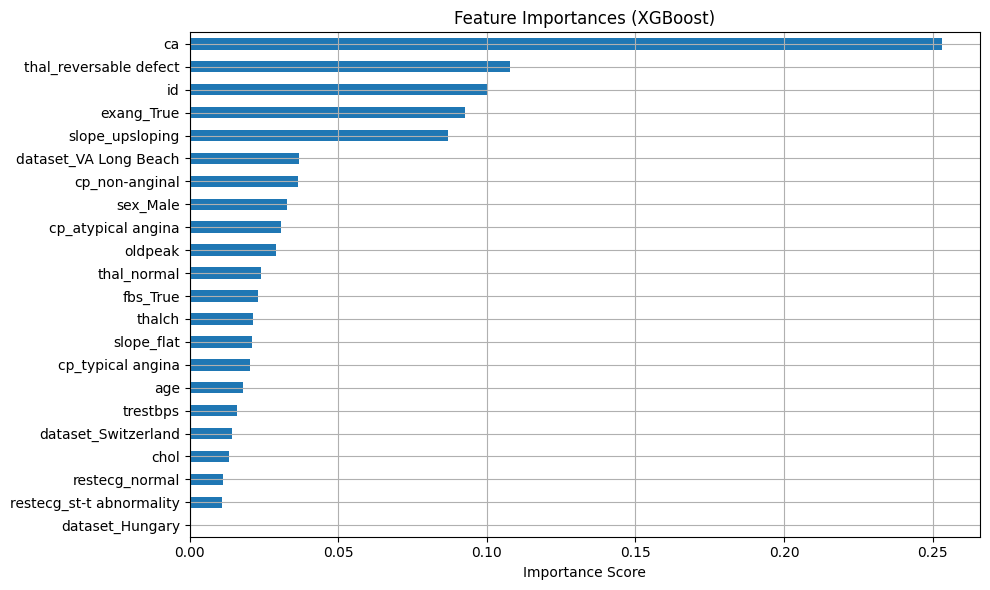

In [73]:
# Feature importance visualization

plt.figure(figsize=(10, 6))
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### **Summary**

This project aims to predict whether a patient has heart disease using clinical data from the UCI Heart Disease dataset. We converted the multi-class target into binary (0 = No Disease, 1 = Disease) for clearer classification.

**Steps:**

1.   Cleaned and preprocessed the data (handled missing values and encoded categorical features)
1.   Split the data into training and test sets
2.   Trained an XGBoost Classifier
2.   Achieved 85.3% accuracy
3.   Evaluated the model using precision, recall, F1-score, and feature importance

The model shows strong performance, especially in identifying patients with heart disease, making it suitable for early diagnosis assistance.